In [68]:
import trade_model as td
dm=td.DataModel("../xcels",["master0.csv","master1.csv"])
dm.read()


In [69]:
df=dm.get("خساپا")
df.index

DatetimeIndex(['2001-05-06', '2001-05-07', '2001-05-08', '2001-05-09',
               '2001-05-12', '2001-05-13', '2001-05-15', '2001-05-16',
               '2001-05-19', '2001-05-20',
               ...
               '2019-09-28', '2019-09-29', '2019-09-30', '2019-10-01',
               '2019-10-02', '2019-10-05', '2019-10-06', '2019-10-07',
               '2019-10-08', '2019-10-09'],
              dtype='datetime64[ns]', name='date', length=3847, freq=None)

In [70]:
%%writefile ta_module.py


import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime
from math import pi
import math
import trade_model as td
import matplotlib.pyplot as plt



def find_supports(firstdate,lastdate,stockname="خساپا",minimum_touch=3):
    dm=td.DataModel("../xcels",["master0.csv","master1.csv"])
    dm.read()
    df=dm.get("خساپا",firstdate,lastdate)
    stocko=df["open"].tolist()
    stockc=df["close"].tolist()
    dates=df.index # for converting startm s to real date .... startm and stopm s are some indexes of stoko array
    
    lows=[]
    lows_price=[]
    for j in range(len(stocko)): 
        minimum=min(stocko[j],stockc[j])
        if ( (j >10) and (j+10 < len(stocko)) ):
            if (minimum<=min(stocko[j-10:j+10]) and minimum<=min(stockc[j-10:j+10])):
                lows.append(j)
                lows_price.append(minimum)

        #finding the best lines 
    # cnt = numbers of line segments
    cnt=0
    # start and stop[cnt] = start poit in x axes and stop point for each line segments
    startm=[]
    stopm=[]
    checkedpoint=[]
    lastpoint=0
    count_max=0
    a_maxm=[]
    b_maxm=[]
    xarr=lows
    yarr=lows_price
    max_last=0
    # all tangents from 80 to -80 digree . i will break them in to 1000 pieces
    digree=np.linspace(-80,80,1000)
    digrees=np.tan(digree*pi / 180)


    for point in range(len(xarr)) :
        max_last=0
        count_max=0
    #  x and y are the ones of this point
        x=xarr[point]
        y=yarr[point]
    # for this point i am breaking the line into 100 pieces
        b_fakes=np.linspace(y-15,y+15,100)  
        for b in b_fakes:
            for a in digrees:
                count=0
                for p in range(point+1,len(xarr)):
                #  x_ and y_ s are for all next points in new dimensions !!
                    x_ = xarr[p]-x
                    y_ = yarr[p]
                    if((x_*a+b>=y_-15) and (x_*a+b<=y_+15)):
                        count+=1
                        lastpoint=xarr[p]
                    elif (y_+10 < x_*a+b ):
                        break
                if(count>count_max):
                    max_last=lastpoint # max last baraye save kardane lastpointi ke niaz darime . maxof_a , b ham hamintor
                    count_max=count
                    maxof_a=a
                    maxof_b=b
                lastpoint=0

    #   if this start point include a line that touch three points: count_max are the number of other points (=2) . so it should be >= minimum touch -1
        if(count_max>=minimum_touch-1):
            repetitious=False
            a_in_radian=math.atan(maxof_a)
            a_in_degree=math.degrees(a_in_radian)
            for cnt in range(len(a_maxm)):
                if((math.degrees(math.atan(a_maxm[cnt])) >= a_in_degree -5) and 
                   (math.degrees(math.atan(a_maxm[cnt])) <= a_in_degree +5) and
                   (stopm[cnt]==max_last)):
                    repetitious=True

            if(not(repetitious)):
                a_maxm.append(maxof_a)
                b_maxm.append(maxof_a*(-x)+maxof_b)
                startm.append(x)
                stopm.append(max_last)
    
#     dates[startm]  because we wanna return exact date
    return dates[startm],dates[stopm],a_maxm,b_maxm,df


def find_resistances(firstdate,lastdate,stockname="خساپا",minimum_touch=3):
    dm=td.DataModel("../xcels",["master0.csv","master1.csv"])
    dm.read()
    df=dm.get(stockname,firstdate,lastdate)
   
    stocko=df["open"].tolist()
    stockc=df["close"].tolist()
    dates=df.index # for converting startm s to real date .... startm and stopm s are some indexes of stoko array
    

    highs=[]
    highs_price=[]
    for j in range(len(stocko)): 
        maximum=max(stocko[j],stockc[j])
        if ( (j >10) and (j+10 < len(stocko)) ):
            if (maximum>=max(stocko[j-10:j+10]) and maximum>=max(stockc[j-10:j+10])):
                highs.append(j)
                highs_price.append(maximum)

    #finding the best lines 
    # cnt = numbers of line segments
    cnt=0
    # start and stop[cnt] = start poit in x axes and stop point for each line segments
    start=[]
    stop=[]
    checkedpoint=[]
    lastpoint=0
    count_max=0
    a_max=[]
    b_max=[]
    xarr=highs
    yarr=highs_price
    max_last=0
    # all tangents from 80 to -80 digree . i will break them in to 1000 pieces
    digree=np.linspace(-80,80,1000)
    digrees=np.tan(digree*pi / 180)


    for point in range(len(xarr)) :
        max_last=0
        count_max=0
    #  x and y are the ones of this point
        x=xarr[point]
        y=yarr[point]
    # for this point i am breaking the line into 100 pieces
        b_fakes=np.linspace(y-15,y+15,100)  
        for b in b_fakes:
            for a in digrees:
                count=0
                for p in range(point+1,len(xarr)):
                #  x_ and y_ s are for all next points in new dimensions !!
                    x_ = xarr[p]-x
                    y_ = yarr[p]
                    if((x_*a+b>=y_-15) and (x_*a+b<=y_+15)):
                        count+=1
                        lastpoint=xarr[p]
                    elif (y_-10 > x_*a+b ):
                        break
                if(count>count_max):
                    max_last=lastpoint # max last baraye save kardane lastpointi ke niaz darime . maxof_a , b ham hamintor
                    count_max=count
                    maxof_a=a
                    maxof_b=b
                lastpoint=0

    #   if this start point include a line that touch three points: count_max are the number of other points .
        if(count_max>=minimum_touch-1):
            repetitious=False
            a_in_radian=math.atan(maxof_a)
            a_in_degree=math.degrees(a_in_radian)
            for cnt in range(len(a_max)):
                if((math.degrees(math.atan(a_max[cnt])) >= a_in_degree -5) and 
                   (math.degrees(math.atan(a_max[cnt])) <= a_in_degree +5) and
                   (stop[cnt]==max_last)):
                    repetitious=True

            if(not(repetitious)):
                a_max.append(maxof_a)
                b_max.append(maxof_a*(-x)+maxof_b)
                start.append(x)
                stop.append(max_last)
    #     dates[startm]  because we wanna return exact date
    return dates[start],dates[stop],a_max,b_max,df

Overwriting ta_module.py


In [39]:
startm,stopm,a,b,df=find_supports("1392-01-01","1398-06-20","خساپا")

20
20


In [35]:
df

,symbol,name,amount,volume,value,lastday,open,close,last-change,last-percent,ending,ending-change,ending-percent,min,max,year,month,day,diff_min_max,diff_open
date,,,,,,,,,,,,,,,,,,,,
2013-03-26,خساپا,سايپا,774.0,7006682.0,6.508959e+09,1006.0,939.0,942.0,-64.0,-6.36,929.0,-77.0,-7.65,902.0,960.0,1392,1,6,6.430155,6.660040
2013-03-27,خساپا,سايپا,671.0,4885517.0,4.526153e+09,929.0,942.0,931.0,2.0,0.22,926.0,-3.0,-0.32,911.0,943.0,1392,1,7,3.512623,-1.399354
2013-03-30,خساپا,سايپا,462.0,2747177.0,2.550694e+09,926.0,940.0,922.0,-4.0,-0.43,928.0,2.0,0.22,921.0,943.0,1392,1,10,2.388708,-1.511879
2013-03-31,خساپا,سايپا,401.0,3322290.0,3.086929e+09,928.0,922.0,930.0,2.0,0.22,929.0,1.0,0.11,921.0,938.0,1392,1,11,1.845820,0.646552
2013-04-03,خساپا,سايپا,524.0,5113713.0,4.870601e+09,929.0,935.0,966.0,37.0,3.98,952.0,23.0,2.48,932.0,966.0,1392,1,14,3.648069,-0.645856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03,خساپا,سايپا,8095.0,135685348.0,2.318707e+11,1698.0,1700.0,1697.0,-1.0,-0.06,1709.0,11.0,0.65,1681.0,1747.0,1398,6,12,3.926234,-0.117786
2019-09-04,خساپا,سايپا,7856.0,122627398.0,2.071124e+11,1709.0,1700.0,1675.0,-34.0,-1.99,1689.0,-20.0,-1.17,1668.0,1728.0,1398,6,13,3.597122,0.526624
2019-09-07,خساپا,سايپا,6774.0,108599732.0,1.846353e+11,1689.0,1678.0,1695.0,6.0,0.36,1700.0,11.0,0.65,1677.0,1730.0,1398,6,16,3.160405,0.651273


In [34]:
df.iloc[startm[0]]


symbol                  خساپا
name                    سايپا
amount                    879
volume            1.03478e+07
value             8.29796e+09
lastday                   803
open                      791
close                     790
last-change               -13
last-percent            -1.62
ending                    802
ending-change              -1
ending-percent          -0.12
min                       782
max                       825
year                     1392
month                       1
day                        27
diff_min_max          5.49872
diff_open              1.4944
Name: 2013-04-16 00:00:00, dtype: object

In [27]:
st

,symbol,name,amount,volume,value,lastday,open,close,last-change,last-percent,ending,ending-change,ending-percent,min,max,year,month,day,diff_min_max,diff_open
date,,,,,,,,,,,,,,,,,,,,
2013-03-26,خساپا,سايپا,774.0,7006682.0,6.508959e+09,1006.0,939.0,942.0,-64.0,-6.36,929.0,-77.0,-7.65,902.0,960.0,1392,1,6,6.430155,6.660040
2013-03-27,خساپا,سايپا,671.0,4885517.0,4.526153e+09,929.0,942.0,931.0,2.0,0.22,926.0,-3.0,-0.32,911.0,943.0,1392,1,7,3.512623,-1.399354
2013-03-30,خساپا,سايپا,462.0,2747177.0,2.550694e+09,926.0,940.0,922.0,-4.0,-0.43,928.0,2.0,0.22,921.0,943.0,1392,1,10,2.388708,-1.511879
2013-03-31,خساپا,سايپا,401.0,3322290.0,3.086929e+09,928.0,922.0,930.0,2.0,0.22,929.0,1.0,0.11,921.0,938.0,1392,1,11,1.845820,0.646552
2013-04-03,خساپا,سايپا,524.0,5113713.0,4.870601e+09,929.0,935.0,966.0,37.0,3.98,952.0,23.0,2.48,932.0,966.0,1392,1,14,3.648069,-0.645856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03,خساپا,سايپا,8095.0,135685348.0,2.318707e+11,1698.0,1700.0,1697.0,-1.0,-0.06,1709.0,11.0,0.65,1681.0,1747.0,1398,6,12,3.926234,-0.117786
2019-09-04,خساپا,سايپا,7856.0,122627398.0,2.071124e+11,1709.0,1700.0,1675.0,-34.0,-1.99,1689.0,-20.0,-1.17,1668.0,1728.0,1398,6,13,3.597122,0.526624
2019-09-07,خساپا,سايپا,6774.0,108599732.0,1.846353e+11,1689.0,1678.0,1695.0,6.0,0.36,1700.0,11.0,0.65,1677.0,1730.0,1398,6,16,3.160405,0.651273


In [50]:
print(df.loc[startm[0]])


symbol                  خساپا
name                    سايپا
amount                    879
volume            1.03478e+07
value             8.29796e+09
lastday                   803
open                      791
close                     790
last-change               -13
last-percent            -1.62
ending                    802
ending-change              -1
ending-percent          -0.12
min                       782
max                       825
year                     1392
month                       1
day                        27
diff_min_max          5.49872
diff_open              1.4944
Name: 2013-04-16 00:00:00, dtype: object


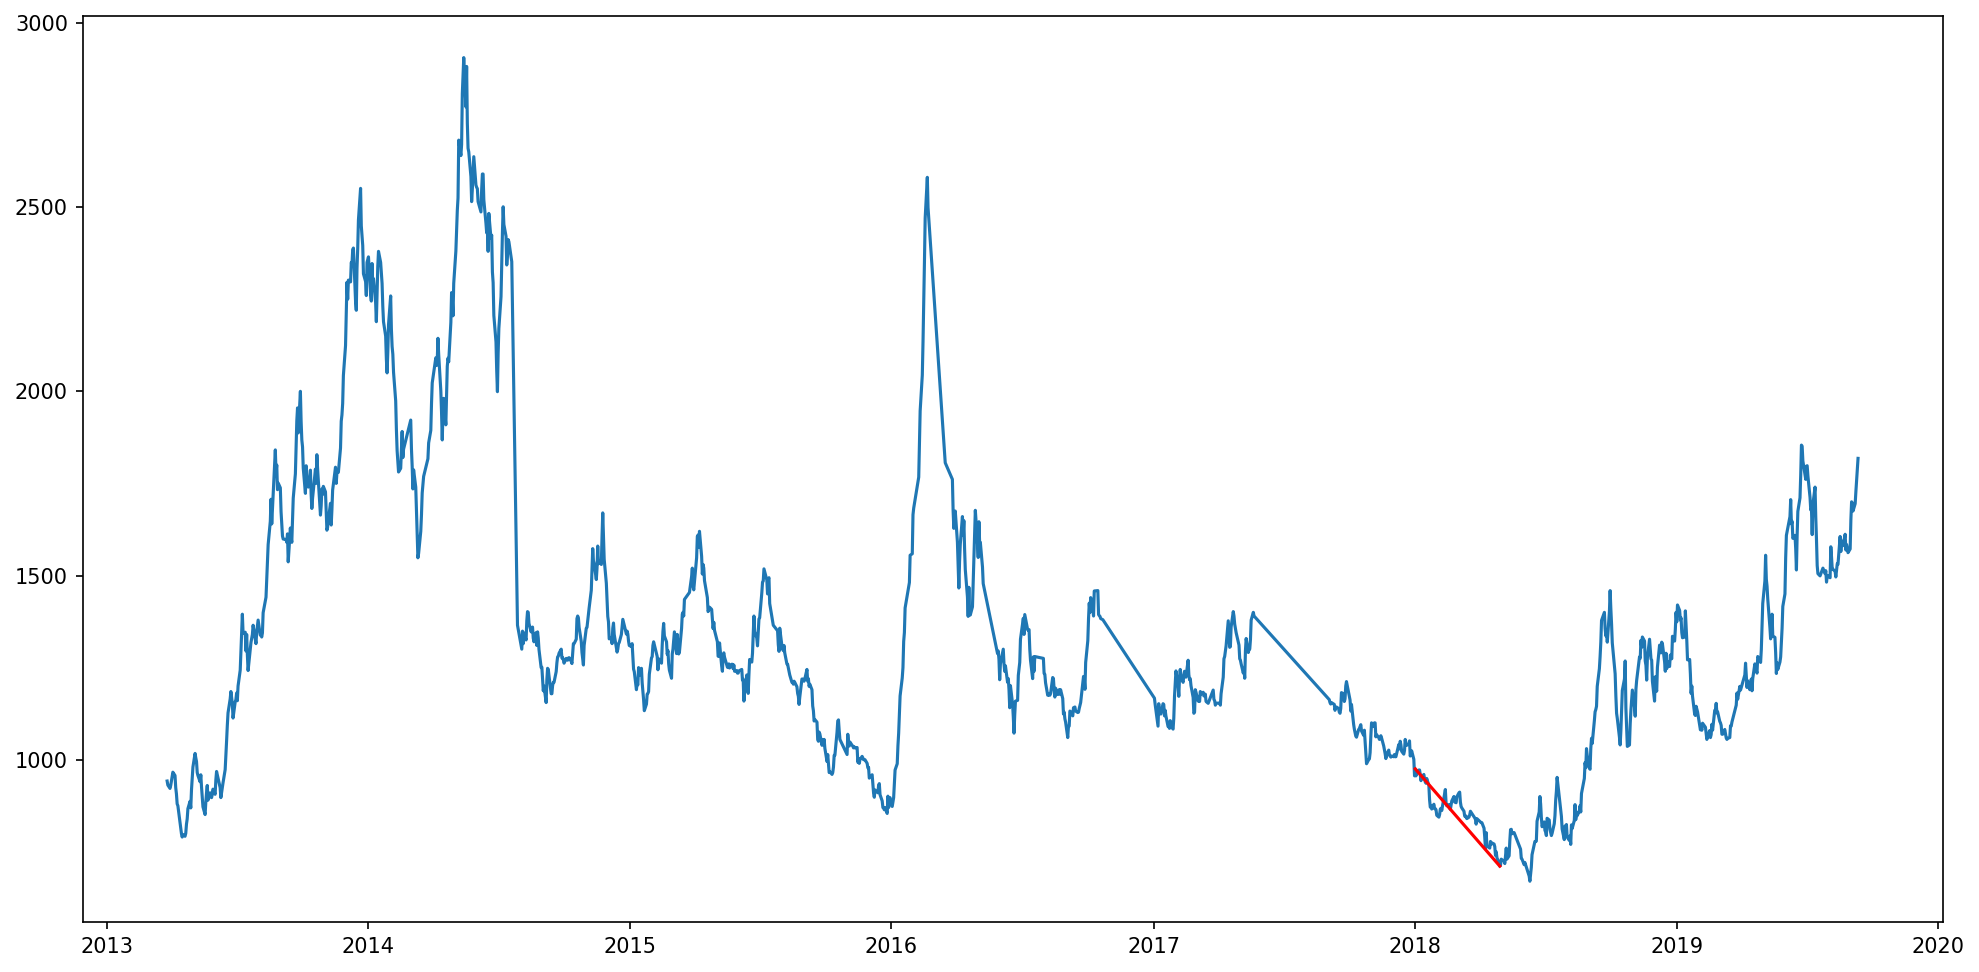

In [64]:
plt.figure(figsize=(16,8),dpi=150)
plt.plot(df.index,df["close"])
i=16
plt.plot([startm[i],stopm[i]],[df.loc[startm[i]]["close"],df.loc[stopm[i]]["close"]],c="r")

In [15]:
df

,symbol,name,amount,volume,value,lastday,open,close,last-change,last-percent,ending,ending-change,ending-percent,min,max,year,month,day,diff_min_max,diff_open
date,,,,,,,,,,,,,,,,,,,,
2001-05-06,خساپا,سايپا,77,55879,181379751,3213.0,3213.0,3260.0,47.0,1.46,3260.0,47.0,1.46,3100.0,3500.0,1380,2,16,12.903226,0.000000
2001-05-19,خساپا,سايپا,24,26226,90483021,3449.0,3451.0,3440.0,-9.0,-0.26,3440.0,-9.0,-0.26,3440.0,3452.0,1380,2,29,0.348837,-0.057988
2001-05-23,خساپا,سايپا,28,16305,55159260,3380.0,3399.0,3398.0,18.0,0.53,3398.0,18.0,0.53,3376.0,3399.0,1380,3,2,0.681280,-0.562130
2001-05-28,خساپا,سايپا,39,35706,121141724,3400.0,3398.0,3387.0,-13.0,-0.38,3387.0,-13.0,-0.38,3387.0,3400.0,1380,3,7,0.383820,0.058824
2001-05-29,خساپا,سايپا,12,5596,18934395,3387.0,3390.0,3386.0,-1.0,-0.03,3386.0,-1.0,-0.03,3350.0,3390.0,1380,3,8,1.194030,-0.088574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-05,خساپا,سايپا,10206,189924026,431175136482,2193.0,2254.0,2236.0,43.0,1.96,2270.0,77.0,3.51,2201.0,2302.0,1398,7,13,4.588823,-2.781578
2019-10-06,خساپا,سايپا,7542,123395414,270306518647,2270.0,2240.0,2183.0,-87.0,-3.83,2191.0,-79.0,-3.48,2157.0,2250.0,1398,7,14,4.311544,1.321586
2019-10-07,خساپا,سايپا,7493,112887598,247976720452,2191.0,2200.0,2160.0,-31.0,-1.41,2197.0,6.0,0.27,2100.0,2299.0,1398,7,15,9.476190,-0.410771
